# Study of Glassdoor Data

The purpose of this study is too quickly present the Glassdoor data with the different attributes 

The datasets have been cleaned with cleaning functions written in python 

We will then study the signification of missing data 

## Import packages and constants and helpers 

In [2]:
# Packages 
import pandas as pd 
from autoc.explorer import DataExploration 
from autoc.naimputer import NaImputer
from autoc import missing_map

%pylab inline --no-import
import pylab as pl
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Seaborn options 
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.style.use('ggplot') # ggplot2 style for mathplotlib 

# path to cleaned datasets 
path_reviews_cleaned = '~/Google Drive/Auto_clean/Datasets/Glassdoor/'


Populating the interactive namespace from numpy and matplotlib


## I- Glassdoor Cleaned Reviews Data
https://www.glassdoor.com/

### Presentation

In [3]:
df_reviews = pd.read_csv(path_reviews_cleaned + 'glassdoor_reviews_cleaned_utf8_170415.csv')
df_reviews.shape
# Around 180 000 observations of 35 predictors

/Users/Damien/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(181651, 35)

In [4]:
df_reviews.head()

,website,interview_difficulty,ceo_name,nb_c_jobs,company_description,registered_employer,benefits_below,similar_companies,acquired_by,founded,...,awards,ceo_rating,type,industry,operated_by,headquarters_city,headquarters_state,nb_awards_after_2000,has_website,ticker
0,www.target.com,2.8,Brian Cornell,NaN,From our Minneapolis-based headquarters to ove...,Engaged Employer,NaN,"Walmart,The Home Depot,Walgreens,Macy's,Bank o...",NaN,1962,...,"Best Companies for Hourly Workers,Working Moth...",66,Company - Public with Ticker,Retail,NaN,Minneapolis,MN,2,1,TGT
1,www.homedepot.com,2.3,Craig Menear,1700,NaN,Engaged Employer,NaN,NaN,NaN,1978,...,"World's Most Admired Companies of 2013,Fortune...",80,Company - Public with Ticker,Retail,NaN,Atlanta,GA,6,1,HD
2,www.army.mil,2.3,John McHugh,NaN,The US Department of the Army has its marching...,Engaged Employer,NaN,"Walmart,US Navy,The Home Depot,UPS,Bank of Ame...",NaN,1775,...,"Best Places to Work for Commuters,National Cen...",77,Government,Government,NaN,Washington,DC,2,1,NaN
3,www.att.com,2.7,Randall L. Stephenson,2100,We understand that our customers want an easie...,NaN,NaN,NaN,NaN,1876,...,"Happiest Companies for Young Professionals,For...",71,Company - Public with Ticker,Telecommunications,NaN,Dallas,TX,5,1,T
4,www.bestbuy.com,2.4,Hubert Joly,NaN,The biggest consumer electronics outlet in the...,Engaged Employer,NaN,"Walmart,The Home Depot,AT&T,Lowe's,Target,Bank...",NaN,1966,...,"Employees’ Choice -50 Best Places to Work,Glas...",74,Company - Public with Ticker,Retail,NaN,Richfield,MN,2,1,BBY


In [5]:
# Example of Reviews
df_reviews[df_reviews.company_name == 'Dataiku'] 

# too bad ! (Dataset clearly not up to date)

,website,interview_difficulty,ceo_name,nb_c_jobs,company_description,registered_employer,benefits_below,similar_companies,acquired_by,founded,...,awards,ceo_rating,type,industry,operated_by,headquarters_city,headquarters_state,nb_awards_after_2000,has_website,ticker


In [6]:
df_reviews[df_reviews.company_name == 'Google'].iloc[0]

website                                                      www.google.com
interview_difficulty                                                    3.4
ceo_name                                                         Larry Page
nb_c_jobs                                                               NaN
company_description       Google is not a conventional company, and we d...
registered_employer                                        Engaged Employer
benefits_below                                                          NaN
similar_companies         Facebook,Amazon.com,IBM,Apple,Microsoft,Cisco ...
acquired_by                                                             NaN
founded                                                                1998
affiliated_company        YouTube,Nest,Motorola Mobility,Wildfire Intera...
nb_ratings_ceo                                                         1777
stars                                                                   4.4
nb_c_reviews

### Quick exploration 

In [7]:
exploration = DataExploration(df_reviews)

In [8]:
exp_df=exploration.structure()
exp_df

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer
website,object,character,9796,0.053928,169844,False,False,False,mixed
interview_difficulty,float64,numeric,122927,0.676721,41,False,False,False,floating
ceo_name,object,character,90996,0.500939,85347,False,False,False,mixed
nb_c_jobs,float64,numeric,179486,0.988082,478,False,False,False,floating
company_description,object,character,146083,0.804196,35523,False,False,False,mixed
registered_employer,object,factor,465,0.002560,2,False,False,False,mixed
benefits_below,float64,numeric,181651,1.000000,0,False,True,False,floating
similar_companies,object,character,9683,0.053306,55616,False,False,False,mixed
acquired_by,object,character,181151,0.997247,432,False,False,False,mixed
founded,float64,numeric,125140,0.688903,312,False,False,False,floating


In [9]:
# These three columns help to exactly identify the company and can replace the DataFrame index.
exp_df[exp_df['is_key']==True]

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer
url,object,character,0,0,181651,False,False,True,string
employer_id,int64,numeric,0,0,181651,False,False,True,integer
company_name,object,character,0,0,181651,False,False,True,string


In [10]:
# Empty columns ?
exp_df[exp_df['perc_missing']>0.9]

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key,dtype_infer
nb_c_jobs,float64,numeric,179486,0.988082,478,False,False,False,floating
benefits_below,float64,numeric,181651,1.000000,0,False,True,False,floating
acquired_by,object,character,181151,0.997247,432,False,False,False,mixed
affiliated_company,object,character,179053,0.985698,2432,False,False,False,mixed
benefits_above,float64,numeric,181651,1.000000,0,False,True,False,floating
awards,object,character,171181,0.942362,7812,False,False,False,mixed
operated_by,object,character,180142,0.991693,742,False,False,False,mixed
ticker,object,character,175746,0.967493,5659,False,False,False,mixed


In [11]:
# There some features with very high percentage of missing values ('nb_c_jobs','affiliated_company','awards',...)
# This is because these features are only relevant for a small number of companies (Not every company wins an award !)

# Benefits_below and benefits_above are full NA columns : no use in keeping them.
df_reviews = df_reviews.drop(labels = ['benefits_below','benefits_above'],axis = 1)

### Close-up on 'Stars' ratings (INTERESSANT MAIS UTILE POUR L'ETUDE ?)

In [12]:
# Say we are interested in the 'Stars' info, which is probably the most generic info to compare each company
# There are 364 missing values which we can neglect

df_reviews[pd.isnull(df_reviews.stars)].company_name.count()

364

In [13]:
df_reviews = df_reviews.dropna(subset=['stars'])

In [14]:
# Let's sort data according to the number of stars, taking into account companies with at least 50 reviews
df_sort = df_reviews[df_reviews.nb_c_reviews_detailled > 50].sort_values('stars',ascending=False).reset_index()

In [15]:
print('Uber is the {} happiest company'.format(str(df_sort[(df_sort.company_name == "Uber")].index[0])))

Uber is the 2394 happiest company


In [16]:
df_sort.head(5)
# Apart from Dropbox, top companies aren't that famous ! But they do have "Best Place to work Awards"

,index,website,interview_difficulty,ceo_name,nb_c_jobs,company_description,registered_employer,similar_companies,acquired_by,founded,...,awards,ceo_rating,type,industry,operated_by,headquarters_city,headquarters_state,nb_awards_after_2000,has_website,ticker
0,4875,www.elitesem.com,3.3,Ben Kirshner,NaN,NaN,Engaged Employer,"Andiamo Partners,Crowdtap,Carrot,Twitter,Wink,...",NaN,2004,...,"Best Places to Work 2013,Crain's New York Busi...",100,Company - Private,Business Services,NaN,New York,NY,2,1,NaN
1,3681,www.pluralsight.com,3.3,Aaron Skonnard,NaN,"At Pluralsight, we have three core values that...",Engaged Employer,"Instructure,Domo,Qualtrics,Overstock.com,Curas...",NaN,2004,...,"Best Companies to Work For (Utah),Utah Busines...",100,Company - Private,Education,NaN,Farmington,UT,2,1,NaN
2,3901,www.gohomeside.com,3.8,Michael Baynes,NaN,"Founded by industry veterans, Homeside Financi...",Engaged Employer,"PMAC Lending Services,Residential Finance,Worl...",NaN,2013,...,NaN,100,Company - Private,Finance,NaN,Columbia,MD,0,1,NaN
3,1986,www.dropbox.com,3.1,Drew Houston,184,Dropbox is the home for your most important st...,Engaged Employer,NaN,NaN,2007,...,"Founder of the Year Crunchie,Tech Crunch,2014",98,Company - Private,Information Technology,NaN,San Francisco,CA,1,1,NaN
4,4617,www.bestversionmedia.com,1.6,David Durand,3500,Best Version Media (BVM) brings neighbors toge...,NaN,NaN,NaN,2007,...,NaN,100,Company - Private,Media,NaN,Brookfield,WI,0,1,NaN


### Look at stars data 

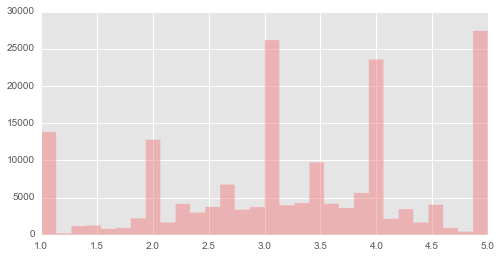

In [17]:
p = plt.hist(df_reviews.stars,bins = 30,histtype="stepfilled", color="#F08080", alpha=.5)

**Notes**: You can see the problem of a real life distribution (discontinuous because of small companies) 

In [18]:
order = [u'1 to 5 Employees',u'6 to 15 Employees',u'16 to 50 Employees',
         u'50 to 149 Employees', u'150 to 499 Employees', u'500 to 999 Employees',
         u'1000 to 5000 Employees', u'5000+ Employees','Unknown']

/Users/Damien/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


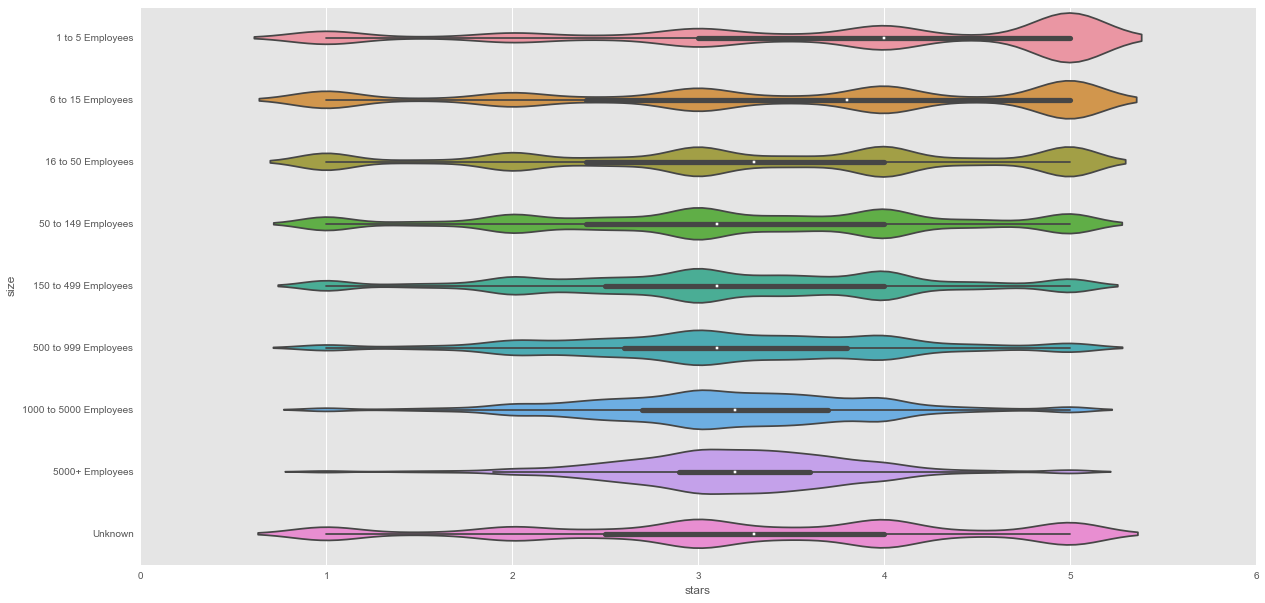

In [19]:
# Violin plot 
pl.figure(figsize=(20, 10))
sns.violinplot(df_reviews.stars, df_reviews['size'],order=order)

**Notes**:  You can see the discontinuity for company with few employees 

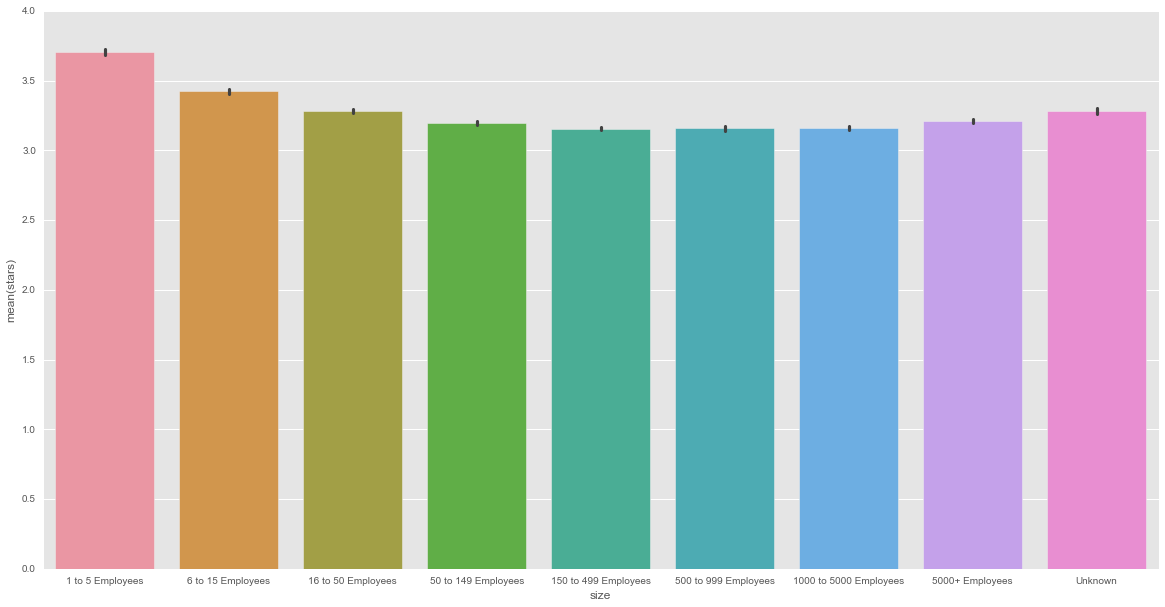

In [20]:
# Stars per size of the company
pl.figure(figsize=(20, 10))
sns.barplot("size", "stars",order = order,data = df_reviews)

In [21]:
big_companies = df_reviews.loc[df_reviews['size'] == "5000+ Employees"]

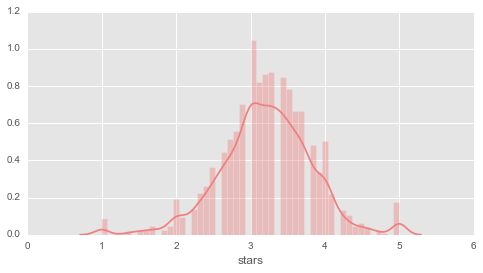

In [22]:
sns.distplot(big_companies.stars,color = '#F08080')

### II- Missing Data Exploration

#### Some Theory 

##### Lay and Rubbin 

This is a scraped and real dataset with a lot of missing data we are going to try to respond to lay and rubin theory  

*  **MCAR** : "Missing completely at random": the missing values are completely random and doesn/t depend from observations or any other factor.
*  **MAR** :  "Missing at random":  missing values depends from the observations.
*  **NMAR** : , "Not Missing at random": missing values depends on the unobserved original data values.

##### Purpose of the study

We are going to use statistic such as conditionnal expectation 

#### Using autoc DataExploration class

In [23]:
exploration = DataExploration(df_reviews)

In [24]:
exploration.nacolcount().head()

,Nanumber,Napercentage
website,9775,0.053920
interview_difficulty,122600,0.676276
ceo_name,90716,0.500400
nb_c_jobs,179122,0.988058
company_description,145774,0.804106


In [25]:
df_test = df_reviews.copy()

In [26]:
df_test['is_na_interview_difficulty'] = df_test.interview_difficulty.isnull().astype(int)

In [27]:
def cserie(serie):
    return serie[serie].index.tolist()
cserie((df_test.dtypes == int) | (df_test.dtypes == float))

['interview_difficulty',
 'nb_c_jobs',
 'founded',
 'nb_ratings_ceo',
 'stars',
 'nb_c_reviews_detailled',
 'nb_c_interviews',
 'friend_recommend',
 'employer_id',
 'nb_c_salaries',
 'ceo_rating',
 'nb_awards_after_2000',
 'has_website',
 'is_na_interview_difficulty']

In [28]:
def plot_hist_na(df, colname):
    df_h = df.copy()
    na_name = "is_na_{}".format(colname)
    df_h[na_name] = df_h[colname].isnull().astype(int)
    measure_col = cserie((df.dtypes == int) | (df.dtypes == float))
    df_h.groupby(na_name)[measure_col].hist()
    

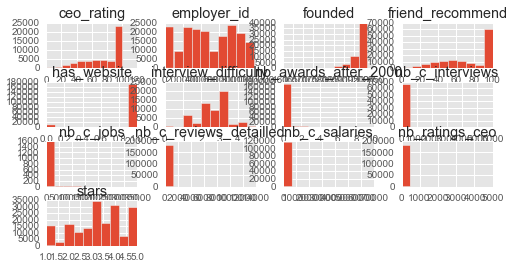

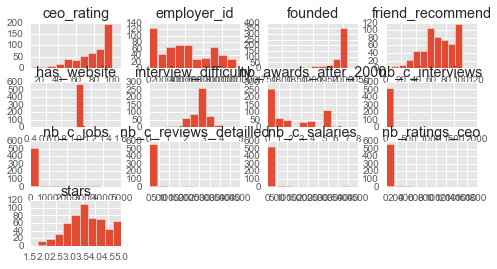

In [29]:
plot_hist_na(df_reviews,"revenue")

ValueError: x must have at least one data point

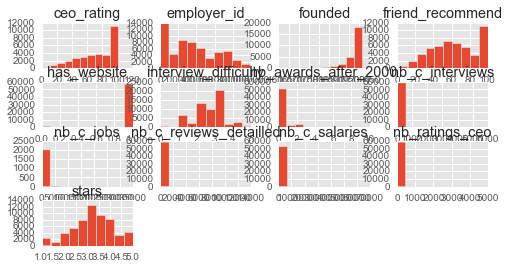

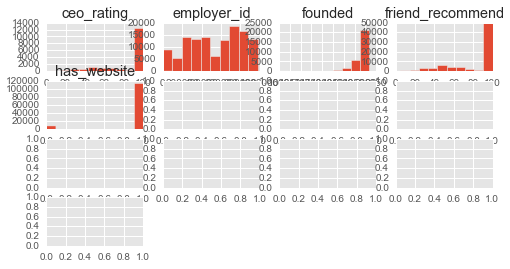

In [32]:
plot_hist_na(df_reviews,"interview_difficulty")

In [79]:
df_test.dtypes.head(10)

website                  object
interview_difficulty    float64
ceo_name                 object
nb_c_jobs               float64
company_description      object
registered_employer      object
similar_companies        object
acquired_by              object
founded                 float64
affiliated_company       object
dtype: object

In [77]:
df_test['is_na_interview_difficulty'];

In [81]:
df_test.groupby('is_na_interview_difficulty').describe()

ceo_rating    employer_id       founded  \
is_na_interview_difficulty                                                    
0                          count  31279.000000   58724.000000  26804.000000   
                           mean      73.162985  351062.252571   1975.338643   
                           std       25.149155  268324.136412     40.579978   
                           min        1.000000       1.000000   1616.000000   
                           25%       54.000000  115286.250000   1967.000000   
                           50%       77.000000  320398.500000   1990.000000   
                           75%      100.000000  568771.500000   2001.000000   
                           max      100.000000  982925.000000   2015.000000   
1                          count  18029.000000  122927.000000  29707.000000   
                           mean      85.580620  544192.991288   1978.506009   
                           std       23.414423  276800.797153     36.279928   
                           min        5.000000       9.000000   1601.000000   
                           25%       70.000000  317690.500000   1969.000000   
                           50%      100.000000  587484.000000   1989.000000   
                           75%      100.000000  781332.500000   2001.000000   
                           max      100.000000  983128.000000   2015.000000   

                                  friend_recommend    has_website  \
is_na_interview_difficulty                                          
0                          count      50790.000000   58724.000000   
                           mean          63.559362       0.977965   
                           std           25.589916       0.146800   
                           min            2.000000       0.000000   
                           25%           44.000000       1.000000   
                           50%           62.000000       1.000000   
                           75%           85.000000       1.000000   
                           max          100.000000       1.000000   
1                          count      75625.000000  122927.000000   
                           mean          83.448754       0.930837   
                           std           25.156986       0.253732   
                           min            5.000000       0.000000   
                           25%           63.000000       1.000000   
                           50%          100.000000       1.000000   
                           75%          100.000000       1.000000   
                           max          100.000000       1.000000   

                                  interview_difficulty  nb_awards_after_2000  \
is_na_interview_difficulty                                                     
0                          count          58724.000000          58724.000000   
                           mean               2.517157              0.284790   
                           std                0.835681              0.840671   
                           min                0.000000              0.000000   
                           25%                2.000000              0.000000   
                           50%                2.700000              0.000000   
                           75%                3.000000              0.000000   
                           max                5.000000              9.000000   
1                          count              0.000000         122927.000000   
                           mean                    NaN              0.028676   
                           std                     NaN              0.221847   
                           min                     NaN              0.000000   
                           25%                     NaN              0.000000   
                           50%                     NaN              0.000000   
                           75%                     NaN              0.000000   
          

is_na_interview_difficulty
0    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
1    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

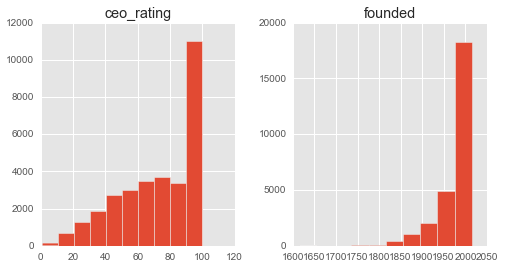

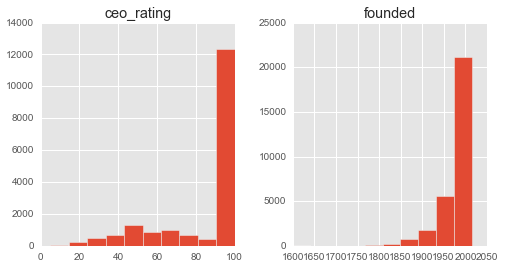

In [82]:
df_test.groupby('is_na_interview_difficulty')[['founded','ceo_rating']].hist()

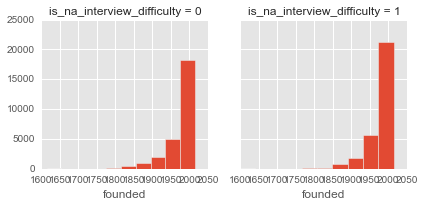

In [83]:
# g = sns.FacetGrid(tips, col="time")
# g.map(plt.hist, "tip");
g = sns.FacetGrid(data=df_test, col='is_na_interview_difficulty')
g.map(plt.hist, "founded")

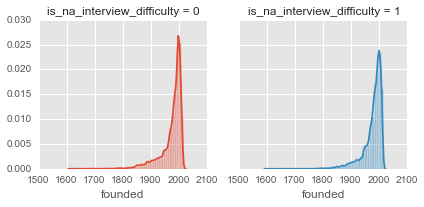

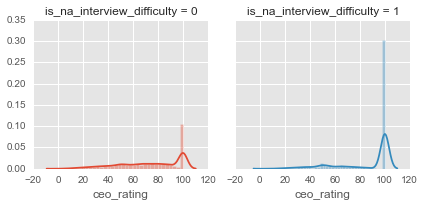

In [84]:

for col in ['founded','ceo_rating']:
    g = sns.FacetGrid(data=df_test, col='is_na_interview_difficulty',hue="is_na_interview_difficulty")
    g.map(sns.distplot, col)


/Users/Damien/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


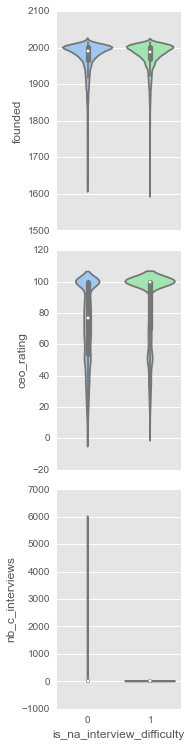

In [85]:

g = sns.PairGrid(df_test,
                 y_vars=["founded", "ceo_rating", "nb_c_interviews"],
                 x_vars=["is_na_interview_difficulty"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel")

### Naimputer Examples

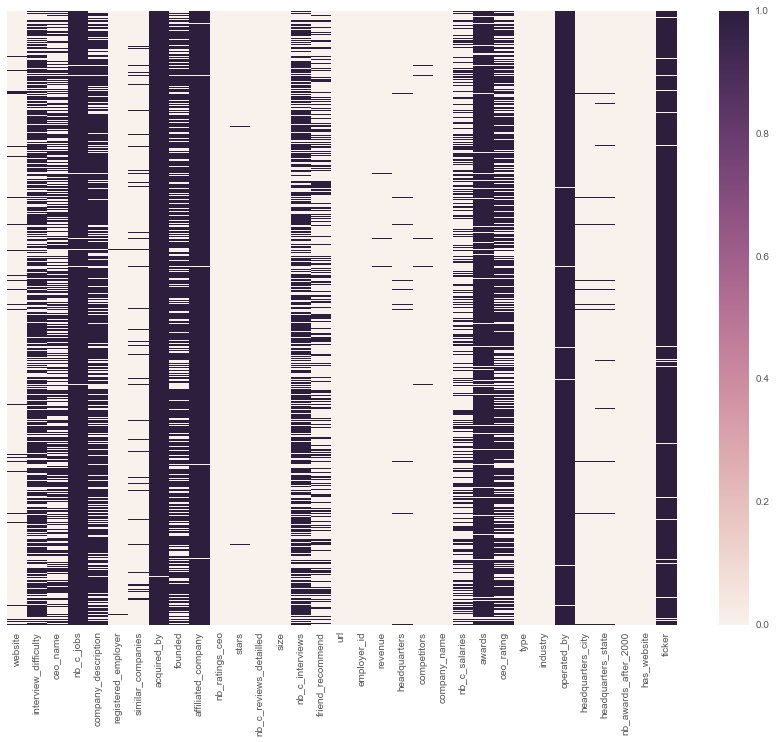

In [92]:
missing_map(df_reviews, nmax=1000)

In [93]:
na = NaImputer(df_reviews)

In [89]:
na.get_isna_mean(colname='ceo_rating')

is_na_ceo_rating                         0              1
interview_difficulty   mean       2.604396       2.417730
                       std        0.724465       0.936793
                       sem        0.004096       0.005655
nb_c_jobs              mean     344.203731      90.257812
                       std     1460.309833     280.136475
                       sem       32.355603      24.760800
founded                mean    1977.595504    1976.448218
                       std       38.078957      38.714104
                       sem        0.230211       0.226747
nb_ratings_ceo         mean      15.779265       0.105136
                       std       88.115540       0.546815
                       sem        0.396820       0.001503
stars                  mean       3.405332       3.238622
                       std        0.794065       1.259332
                       sem        0.003576       0.003466
nb_c_reviews_detailled mean      39.134319       2.704125
                       std      234.874781       8.651143
                       sem        1.057737       0.023781
nb_c_interviews        mean      16.267320       1.965612
                       std      101.284068       4.731838
                       sem        0.552764       0.026150
friend_recommend       mean      64.669850      81.982950
                       std       25.160246      26.202291
                       sem        0.115267       0.093360
employer_id            mean  296562.000000  550757.000000
                       std   270713.666646  263573.156867
                       sem     1219.134124     724.520521
nb_c_salaries          mean      72.722814       6.875092
                       std      648.780787      35.252080
                       sem        3.092836       0.129872
ceo_rating             mean      77.703375            NaN
                       std       25.247404            NaN
                       sem        0.113699            NaN
nb_awards_after_2000   mean       0.348807       0.023046
                       std        0.911100       0.202292
                       sem        0.004103       0.000556
has_website            mean       0.992435       0.928799
                       std        0.086647       0.257162
                       sem        0.000390       0.000707

In [94]:
na.isna_summary(colname='ceo_rating')

is_na_ceo_rating            0                                                \
                        count           mean            std   min       25%   
ceo_rating              49308      77.703375      25.247404     1     58.00   
employer_id             49308  296562.216659  270713.666647     1  27534.25   
founded                 27360    1977.595504      38.078957  1616   1970.00   
friend_recommend        47645      64.669850      25.160246     2     46.00   
has_website             49308       0.992435       0.086647     0      1.00   
interview_difficulty    31279       2.604396       0.724465     0      2.10   
nb_awards_after_2000    49308       0.348807       0.911100     0      0.00   
nb_c_interviews         33574      16.267320     101.284068     1      1.00   
nb_c_jobs                2037     344.203731    1460.309833     1     16.00   
nb_c_reviews_detailled  49308      39.134319     234.874781     1      4.00   
nb_c_salaries           44003      72.722814     648.780787     1      3.00   
nb_ratings_ceo          49308      15.779265      88.115540     1      2.00   
stars                   49308       3.405332       0.794065     1      2.90   

is_na_ceo_rating                                         1                 \
                             50%       75%     max   count           mean   
ceo_rating                  87.0     100.0     100       0            NaN   
employer_id             262714.5  460558.5  980483  132343  550757.514799   
founded                   1991.0    2001.0    2015   29151    1976.448218   
friend_recommend            64.0      86.0     100   78770      81.982950   
has_website                  1.0       1.0       1  132343       0.928799   
interview_difficulty         2.7       3.0       5   27445       2.417730   
nb_awards_after_2000         0.0       0.0       9  132343       0.023046   
nb_c_interviews              3.0       8.0    6000   32744       1.965612   
nb_c_jobs                   45.0     170.0   33000     128      90.257812   
nb_c_reviews_detailled       8.0      21.0   13979  132343       2.704125   
nb_c_salaries                9.0      29.0   70000   73678       6.875092   
nb_ratings_ceo               4.0      10.0    4806  132343       0.105136   
stars                        3.4       4.0       5  131979       3.238622   

is_na_ceo_rating                                                            \
                                  std   min        25%       50%       75%   
ceo_rating                        NaN   NaN        NaN       NaN       NaN   
employer_id             263573.156869    24  331632.00  586730.0  773558.5   
founded                     38.714104  1601    1967.00    1988.0    2001.0   
friend_recommend            26.202291     2      59.00     100.0     100.0   
has_website                  0.257162     0       1.00       1.0       1.0   
interview_difficulty         0.936793     0       2.00       2.6       3.0   
nb_awards_after_2000         0.202292     0       0.00       0.0       0.0   
nb_c_interviews              4.731838     1       1.00       1.0       2.0   
nb_c_jobs                  280.136475     2       7.75      19.5      36.5   
nb_c_reviews_detailled       8.651143     0       1.00       1.0       2.0   
nb_c_salaries               35.252080     1       1.00       2.0       5.0   
nb_ratings_ceo               0.546815     0       0.00       0.0       0.0   
stars                        1.259332     1       2.20       3.1       4.0   

is_na_ceo_rating                
                           max  
ceo_rating                 NaN  
employer_id             983128  
founded                   2015  
friend_recommend           100  
has_website                  1  
interview_difficulty         5  
nb_awards_after_2000         7  
nb_c_interviews            545  
nb_c_jobs                 2400  
nb_c_reviews_detailled    2086  
nb_c_salaries             4300  
nb_ratings_ceo              46  
stars                    

In [95]:
na.infos_na()

{'low_na_col': ['registered_employer',
  'nb_ratings_ceo',
  'stars',
  'nb_c_reviews_detailled',
  'size',
  'url',
  'employer_id',
  'revenue',
  'headquarters',
  'competitors',
  'company_name',
  'type',
  'industry',
  'headquarters_city',
  'headquarters_state',
  'nb_awards_after_2000',
  'has_website'],
 'many_na_col': ['nb_c_jobs',
  'acquired_by',
  'affiliated_company',
  'awards',
  'operated_by',
  'ticker'],
 'nacolcount':                         Nanumber  Napercentage
 website                     9796      0.053928
 interview_difficulty      122927      0.676721
 ceo_name                   90996      0.500939
 nb_c_jobs                 179486      0.988082
 company_description       146083      0.804196
 registered_employer          465      0.002560
 similar_companies           9683      0.053306
 acquired_by               181151      0.997247
 founded                   125140      0.688903
 affiliated_company        179053      0.985698
 nb_ratings_ceo               

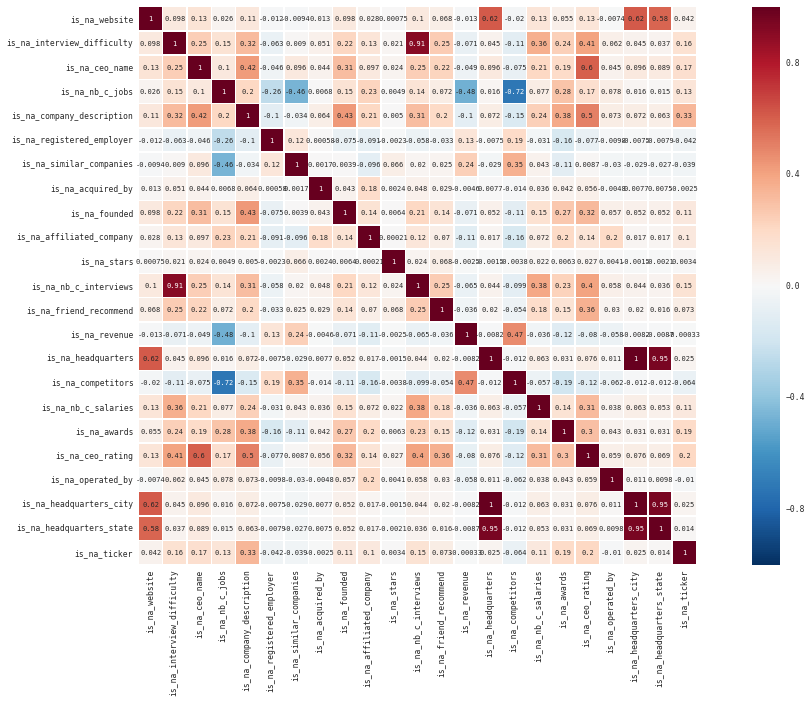

In [96]:
na.corrplot_na(size=7,figsize=(20,10))